# Importing Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

#Plotnine theme
theme_set(theme_light())

# Importing the Data into a DataFrame

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-10-23/movie_profit.csv', index_col = 0)
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action
...,...,...,...,...,...,...,...,...
3397,10/28/2011,Like Crazy,250000.0,3395391.0,3.728400e+06,Paramount Pictures,PG-13,Drama
3398,7/14/2000,Chuck&Buck,250000.0,1055671.0,1.157672e+06,Artisan,R,Drama
3399,3/28/1997,Love and Other Catastrophes,250000.0,212285.0,7.432160e+05,Fox Searchlight,R,Comedy
3400,8/28/1998,I Married a Strange Person,250000.0,203134.0,2.031340e+05,Lionsgate,NaN,Comedy


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3401 entries, 1 to 3401
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3401 non-null   object 
 1   movie              3401 non-null   object 
 2   production_budget  3401 non-null   float64
 3   domestic_gross     3401 non-null   float64
 4   worldwide_gross    3401 non-null   float64
 5   distributor        3353 non-null   object 
 6   mpaa_rating        3264 non-null   object 
 7   genre              3401 non-null   object 
dtypes: float64(3), object(5)
memory usage: 239.1+ KB


Need to convert release date to datetime

In [6]:
df[df['distributor'].isna()]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
1566,6/30/2010,Love Ranch,25000000.0,137885.0,146149.0,NaN,R,Drama
1649,1/1/1970,Darling Lili,22000000.0,5000000.0,5000000.0,NaN,NaN,Drama
1827,8/29/2014,Dwegons and Leprechauns,20000000.0,0.0,0.0,NaN,PG,Adventure
1961,1/1/1981,Roar,17000000.0,2110050.0,2110050.0,NaN,PG,Adventure
2313,10/31/1997,Critical Care,12000000.0,220175.0,220175.0,NaN,R,Drama
2318,3/9/2001,Company Man,12000000.0,146028.0,622273.0,NaN,PG-13,Comedy
2364,1/1/1970,The Molly Maguires,11000000.0,2200000.0,2200000.0,NaN,PG,Drama
2365,1/1/1991,Return to the Blue Lagoon,11000000.0,2000000.0,2000000.0,NaN,PG-13,Adventure
2514,4/23/2010,Joheunnom nabbeunnom isanghannom,10000000.0,128486.0,42226657.0,NaN,R,Action
2527,2/2/2007,Partition,10000000.0,0.0,0.0,NaN,NaN,Drama


## Convert release date to datetime

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'])

## Filter the data where release date < 2018 and gross > 0

In [10]:
movie_profit = df[(df['release_date'] < '2018') & (df['worldwide_gross'] > 0)]
movie_profit

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
1,2007-06-22,Evan Almighty,175000000.0,100289690.0,174131329.0,Universal,PG,Comedy
2,1995-07-28,Waterworld,175000000.0,88246220.0,264246220.0,Universal,PG-13,Action
3,2017-05-12,King Arthur: Legend of the Sword,175000000.0,39175066.0,139950708.0,Warner Bros.,PG-13,Adventure
4,2013-12-25,47 Ronin,175000000.0,38362475.0,151716815.0,Universal,PG-13,Action
6,2014-08-01,Guardians of the Galaxy,170000000.0,333172112.0,771051335.0,Walt Disney,PG-13,Action
...,...,...,...,...,...,...,...,...
3397,2011-10-28,Like Crazy,250000.0,3395391.0,3728400.0,Paramount Pictures,PG-13,Drama
3398,2000-07-14,Chuck&Buck,250000.0,1055671.0,1157672.0,Artisan,R,Drama
3399,1997-03-28,Love and Other Catastrophes,250000.0,212285.0,743216.0,Fox Searchlight,R,Comedy
3400,1998-08-28,I Married a Strange Person,250000.0,203134.0,203134.0,Lionsgate,NaN,Comedy


## Drop duplicate movies

In [11]:
movie_profit['movie'].value_counts()

Tau ming chong                      2
The Santa Clause                    1
Cop Land                            1
The Devil's Double                  1
Scott Pilgrim vs. The World         1
                                   ..
Die Welle                           1
Meet the Deedles                    1
Legend                              1
Universal Soldier II: The Return    1
Imagine That                        1
Name: movie, Length: 3310, dtype: int64

Drop first instance of Tau ming chong

In [14]:
movie_profit = movie_profit.drop_duplicates(subset=['movie'], keep = 'last')

## Lumping and selecting only top 5 distributors rather than all 183

In [20]:
movie_profit['distributor'].value_counts()

Warner Bros.           360
Sony Pictures          332
Universal              299
20th Century Fox       279
Paramount Pictures     261
                      ... 
The Orchard              1
Gold Circle Films        1
MGM/UA Classics          1
Exclusive Releasing      1
XLrator Media            1
Name: distributor, Length: 183, dtype: int64

In [24]:
movie_profit['distributor'].value_counts().nlargest(5).index

['Warner\xa0Bros.',
 'Sony\xa0Pictures',
 'Universal',
 '20th\xa0Century\xa0Fox',
 'Paramount\xa0Pictures']

In [26]:
def lump(distributor):
    if distributor not in movie_profit['distributor'].value_counts().nlargest(5).index.to_list():
        distributor = 'Other'
    return distributor 

In [27]:
movie_profit['distributor'] = movie_profit.apply(lambda x : lump(x['distributor']), axis = 1)

In [29]:
movie_profit['distributor'].value_counts()

Other                 1779
Warner Bros.           360
Sony Pictures          332
Universal              299
20th Century Fox       279
Paramount Pictures     261
Name: distributor, dtype: int64

## Add a decades column for checking trends and plotting them rather than looking at all years

In [34]:
movie_profit['decade'] = (movie_profit['release_date'].dt.year//10) * 10

In [38]:
movie_profit.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,decade,profit_ratio
1,2007-06-22,Evan Almighty,175000000.0,100289690.0,174131329.0,Universal,PG,Comedy,2000,0.995036
2,1995-07-28,Waterworld,175000000.0,88246220.0,264246220.0,Universal,PG-13,Action,1990,1.509978
3,2017-05-12,King Arthur: Legend of the Sword,175000000.0,39175066.0,139950708.0,Warner Bros.,PG-13,Adventure,2010,0.799718
4,2013-12-25,47 Ronin,175000000.0,38362475.0,151716815.0,Universal,PG-13,Action,2010,0.866953
6,2014-08-01,Guardians of the Galaxy,170000000.0,333172112.0,771051335.0,Other,PG-13,Action,2010,4.535596


## Add a profit ratio column i.e. How much money the movies made back -> gross/budget

In [36]:
movie_profit['profit_ratio'] = movie_profit['worldwide_gross'] / movie_profit['production_budget']

In [37]:
movie_profit.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,decade,profit_ratio
1,2007-06-22,Evan Almighty,175000000.0,100289690.0,174131329.0,Universal,PG,Comedy,2000,0.995036
2,1995-07-28,Waterworld,175000000.0,88246220.0,264246220.0,Universal,PG-13,Action,1990,1.509978
3,2017-05-12,King Arthur: Legend of the Sword,175000000.0,39175066.0,139950708.0,Warner Bros.,PG-13,Adventure,2010,0.799718
4,2013-12-25,47 Ronin,175000000.0,38362475.0,151716815.0,Universal,PG-13,Action,2010,0.866953
6,2014-08-01,Guardians of the Galaxy,170000000.0,333172112.0,771051335.0,Other,PG-13,Action,2010,4.535596


# Analysis of the Data

## Looking at the distribution of production budget

C:\Users\Hemant Rattey\anaconda3\envs\minimalds\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 32'. Pick better value with 'binwidth'.


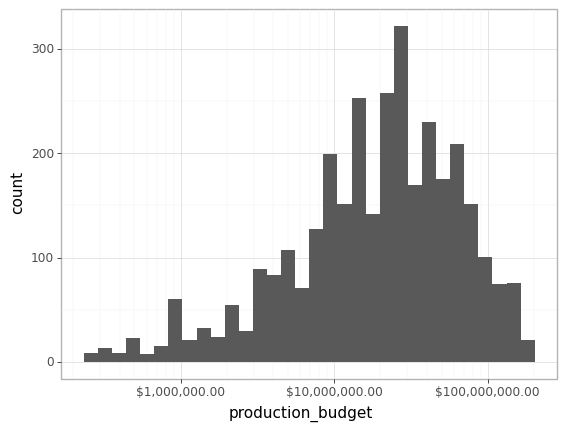

<ggplot: (103910819831)>

In [32]:
from mizani.formatters import currency_format
(
    ggplot(movie_profit, aes(x = 'production_budget'))
    + geom_histogram()
    + scale_x_log10(labels = currency_format('$', big_mark=','))
)

## Looking at distribution of production budget and worldwide gross by each distributor -> Boxplot

In [46]:
# Needed to sort the x axis of the boxplot
budget_per_distributor = movie_profit[['distributor', 'production_budget', 'worldwide_gross']].groupby('distributor').median().reset_index()
budget_per_distributor

,distributor,production_budget,worldwide_gross
0,20th Century Fox,37000000.0,86858578.0
1,Other,12500000.0,18959424.0
2,Paramount Pictures,33500000.0,82933201.0
3,Sony Pictures,35000000.0,72964192.0
4,Universal,35000000.0,90453550.0
5,Warner Bros.,40000000.0,71424984.5


In [47]:
budget_per_distributor.sort_values('production_budget', ascending=False)['distributor']

5          Warner Bros.
0      20th Century Fox
3         Sony Pictures
4             Universal
2    Paramount Pictures
1                 Other
Name: distributor, dtype: object

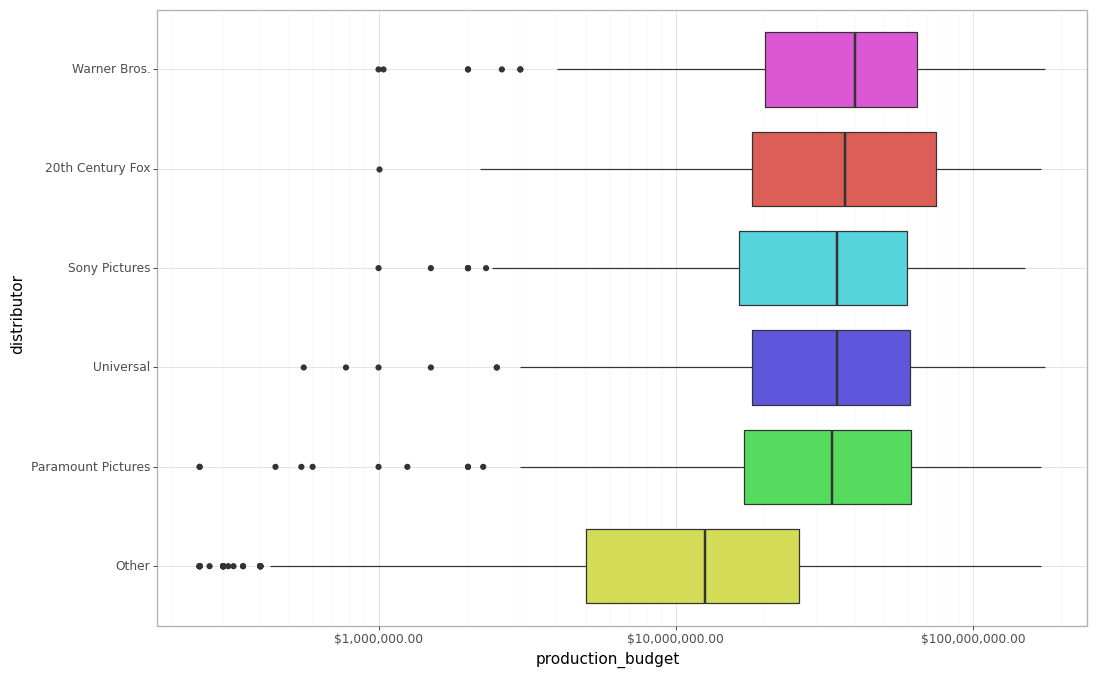

<ggplot: (103907412999)>

In [52]:
(
    ggplot(movie_profit, aes(x = 'distributor', y = 'production_budget', fill = 'distributor'))
    + geom_boxplot()
    + scale_x_discrete(limits = budget_per_distributor.sort_values('production_budget', ascending=False)['distributor'].to_list()[::-1])
    + scale_y_log10(labels = currency_format('$', big_mark=','))
    + coord_flip()
    + theme(legend_position='none', figure_size=(12, 8))
)

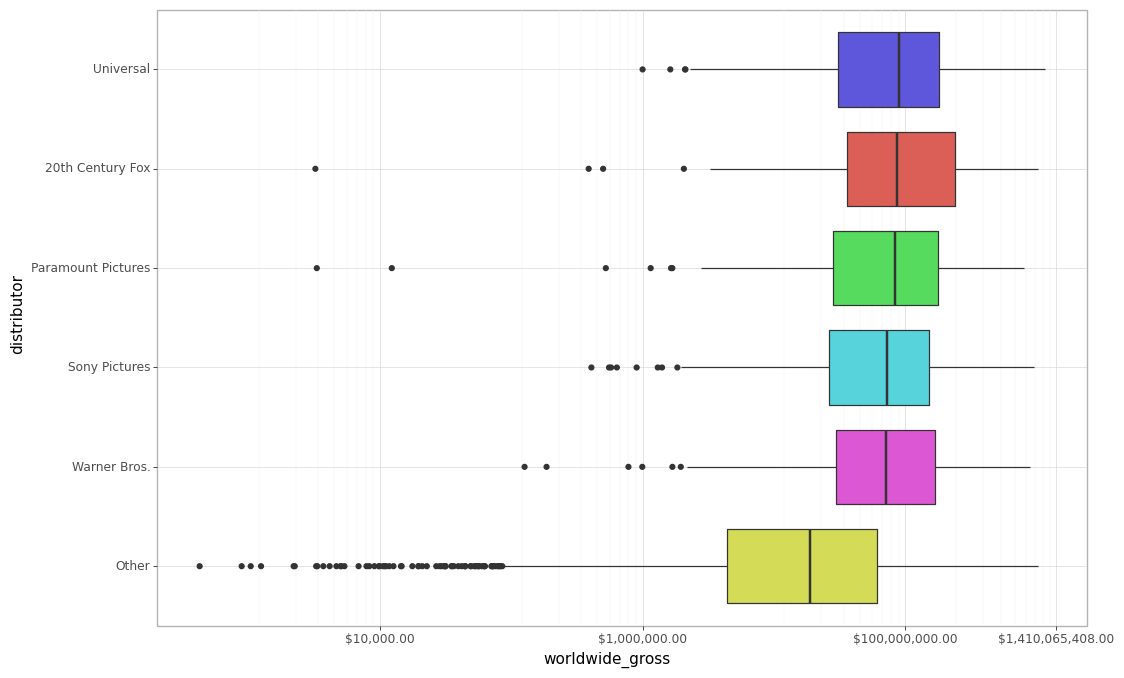

<ggplot: (103910821666)>

In [51]:
(
    ggplot(movie_profit, aes(x = 'distributor', y = 'worldwide_gross', fill = 'distributor'))
    + geom_boxplot()
    + scale_x_discrete(limits = budget_per_distributor.sort_values('worldwide_gross', ascending=False)['distributor'].to_list()[::-1])
    + scale_y_log10(labels = currency_format('$', big_mark=','))
    + coord_flip()
    + theme(legend_position='none', figure_size=(12, 8))
)

## Looking at how budget and gross are distributed by each genre

In [53]:
budget_per_genre = movie_profit[['genre', 'production_budget', 'worldwide_gross']].groupby('genre').median().reset_index()
budget_per_genre

,genre,production_budget,worldwide_gross
0,Action,45000000.0,85763888.0
1,Adventure,54000000.0,122529966.0
2,Comedy,18000000.0,31947712.0
3,Drama,15000000.0,20883834.0
4,Horror,11000000.0,36146087.0


In [54]:
budget_per_genre.sort_values('production_budget', ascending=False)['genre']

1    Adventure
0       Action
2       Comedy
3        Drama
4       Horror
Name: genre, dtype: object

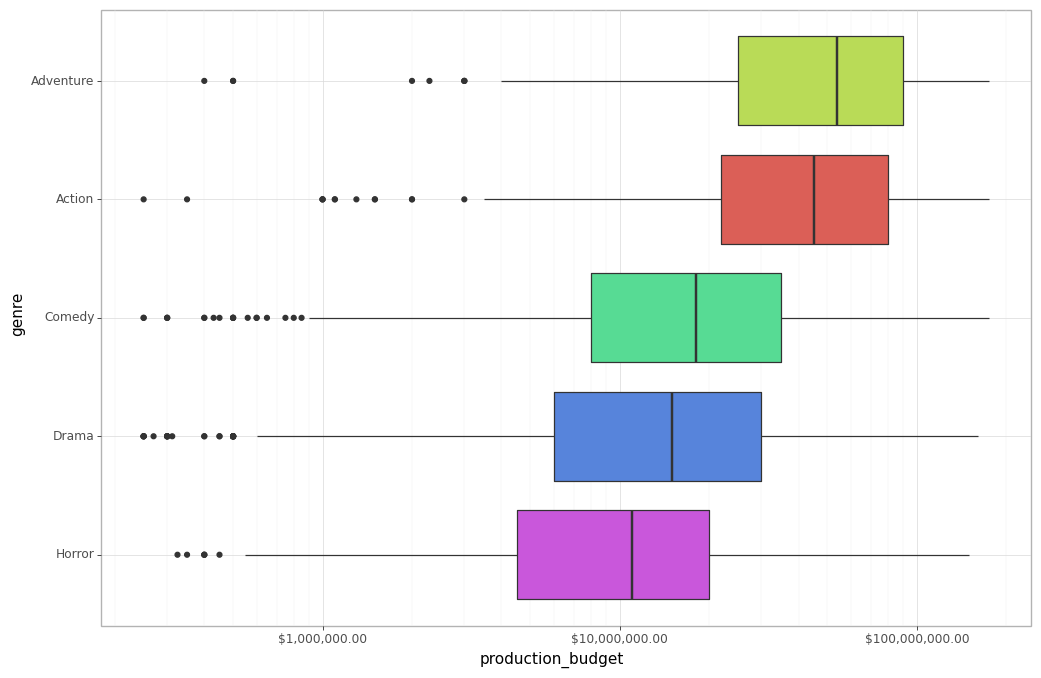

<ggplot: (103907833125)>

In [77]:
(
    ggplot(movie_profit, aes(x = 'genre', y = 'production_budget', fill = 'genre'))
    + geom_boxplot()
    + scale_x_discrete(limits = budget_per_genre.sort_values('production_budget', ascending=False)['genre'].to_list()[::-1])
    + scale_y_log10(labels = currency_format('$', big_mark=','))
    + coord_flip()
    + theme(legend_position='none', figure_size=(12, 8))
)

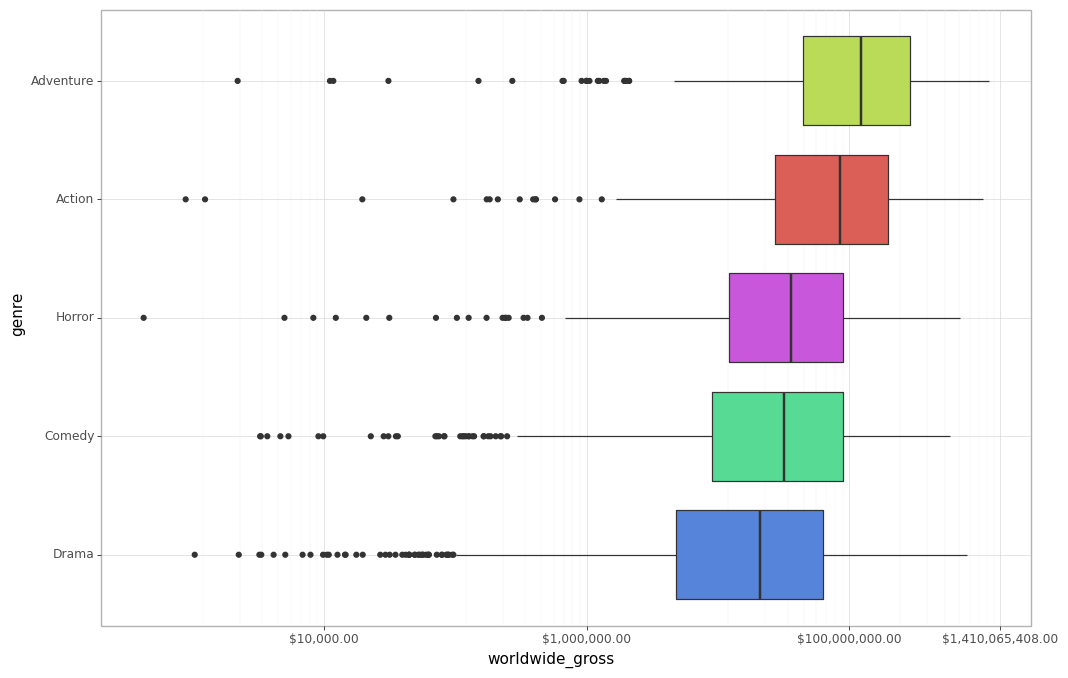

<ggplot: (103910389005)>

In [55]:
(
    ggplot(movie_profit, aes(x = 'genre', y = 'worldwide_gross', fill = 'genre'))
    + geom_boxplot()
    + scale_x_discrete(limits = budget_per_genre.sort_values('worldwide_gross', ascending=False)['genre'].to_list()[::-1])
    + scale_y_log10(labels = currency_format('$', big_mark=','))
    + coord_flip()
    + theme(legend_position='none', figure_size=(12, 8))
)

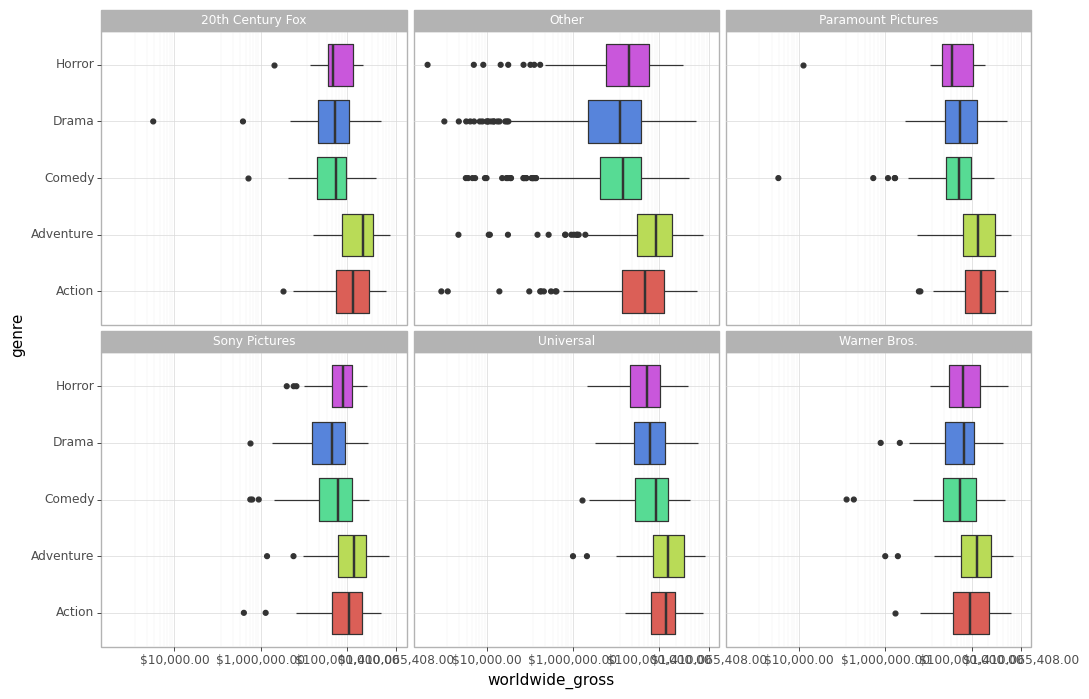

<ggplot: (103911664887)>

In [84]:
(
    ggplot(movie_profit, aes(x = 'genre', y = 'worldwide_gross', fill = 'genre'))
    + geom_boxplot()
    + scale_y_log10(labels = currency_format('$', big_mark=','))
    + coord_flip()
    + theme(legend_position='none', figure_size=(12, 8))
    + facet_wrap('distributor')
)

Like the article itself, one important observation is that Horror movies have the least median budget but often make a lot of money. 

** Note : ** The scale is on a log scale and a small difference can make a lot of difference in median values

## Which genres have the biggest payout ratio?

In [89]:
movie_profit.sort_values('profit_ratio', ascending=False).nlargest(columns = 'profit_ratio', n = 10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,decade,profit_ratio
3365,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,Paramount Pictures,R,Horror,2000,431.517853
3339,1999-07-14,The Blair Witch Project,600000.0,140539099.0,248300000.0,Other,R,Horror,1990,413.833333
3320,1942-08-13,Bambi,858000.0,102797000.0,268000000.0,Other,G,Drama,1940,312.354312
3257,1976-11-21,Rocky,1000000.0,117235147.0,225000000.0,Other,PG,Drama,1970,225.000000
3382,1978-10-17,Halloween,325000.0,47000000.0,70000000.0,Other,R,Horror,1970,215.384615
3330,1973-08-11,American Graffiti,777000.0,115000000.0,140000000.0,Universal,PG,Drama,1970,180.180180
3370,2004-06-11,Napoleon Dynamite,400000.0,44540956.0,46122713.0,Other,PG,Comedy,2000,115.306782
3345,1980-05-09,Friday the 13th,550000.0,39754601.0,59754601.0,Paramount Pictures,NaN,Horror,1980,108.644729
3258,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,Paramount Pictures,R,Horror,2010,101.759490
2983,1939-12-15,Gone with the Wind,3900000.0,198680470.0,390525192.0,Other,G,Drama,1930,100.134665


### Horror movies make a lot of money back as they have low budget but end up making a lot of money

In [104]:
median_profit_ratio = movie_profit[['genre', 'profit_ratio']].groupby('genre').median().reset_index().sort_values('profit_ratio', ascending = False)
median_profit_ratio

,genre,profit_ratio
4,Horror,2.628198
1,Adventure,2.486147
0,Action,2.190186
2,Comedy,1.870901
3,Drama,1.522388


### Horror movies make the most money back 

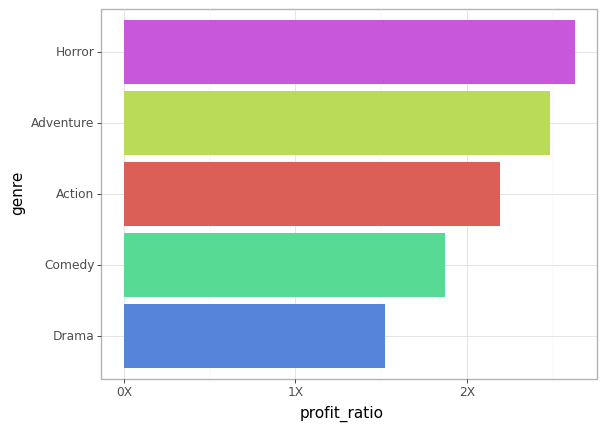

<ggplot: (103915458070)>

In [182]:
from mizani.formatters import custom_format
(
    ggplot(median_profit_ratio, aes(x = 'genre', y = 'profit_ratio', fill = 'genre'))
    + geom_col()
    + coord_flip()
    + scale_x_discrete(limits = median_profit_ratio['genre'].to_list()[::-1])
    + scale_y_continuous(labels = custom_format('{:n}X'))
    + theme(legend_position='none')
)

C:\Users\Hemant Rattey\anaconda3\envs\minimalds\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 70'. Pick better value with 'binwidth'.


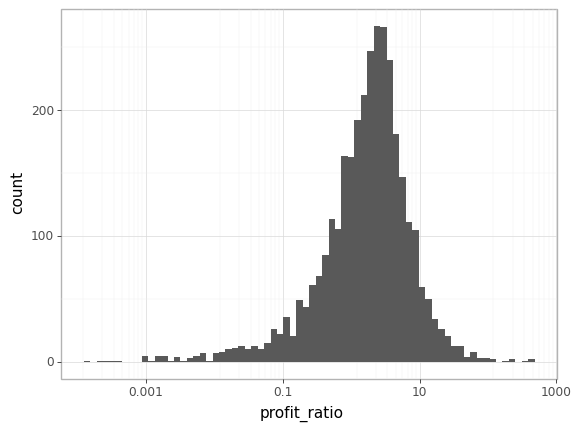

<ggplot: (103917201803)>

In [94]:
(
    ggplot(movie_profit, aes(x = 'profit_ratio'))
    + geom_histogram()
    + scale_x_log10()
)

In [147]:
years = movie_profit[['genre', 'release_date', 'profit_ratio', 'movie', 'distributor', 'decade']].copy()
years

,genre,release_date,profit_ratio,movie,distributor,decade
1,Comedy,2007-06-22,0.995036,Evan Almighty,Universal,2000
2,Action,1995-07-28,1.509978,Waterworld,Universal,1990
3,Adventure,2017-05-12,0.799718,King Arthur: Legend of the Sword,Warner Bros.,2010
4,Action,2013-12-25,0.866953,47 Ronin,Universal,2010
6,Action,2014-08-01,4.535596,Guardians of the Galaxy,Other,2010
...,...,...,...,...,...,...
3397,Drama,2011-10-28,14.913600,Like Crazy,Paramount Pictures,2010
3398,Drama,2000-07-14,4.630688,Chuck&Buck,Other,2000
3399,Comedy,1997-03-28,2.972864,Love and Other Catastrophes,Other,1990
3400,Comedy,1998-08-28,0.812536,I Married a Strange Person,Other,1990


In [148]:
years['year'] = years['release_date'].dt.year

In [149]:
years

,genre,release_date,profit_ratio,movie,distributor,decade,year
1,Comedy,2007-06-22,0.995036,Evan Almighty,Universal,2000,2007
2,Action,1995-07-28,1.509978,Waterworld,Universal,1990,1995
3,Adventure,2017-05-12,0.799718,King Arthur: Legend of the Sword,Warner Bros.,2010,2017
4,Action,2013-12-25,0.866953,47 Ronin,Universal,2010,2013
6,Action,2014-08-01,4.535596,Guardians of the Galaxy,Other,2010,2014
...,...,...,...,...,...,...,...
3397,Drama,2011-10-28,14.913600,Like Crazy,Paramount Pictures,2010,2011
3398,Drama,2000-07-14,4.630688,Chuck&Buck,Other,2000,2000
3399,Comedy,1997-03-28,2.972864,Love and Other Catastrophes,Other,1990,1997
3400,Comedy,1998-08-28,0.812536,I Married a Strange Person,Other,1990,1998


In [150]:
year_trends = years.groupby(['genre', 'distributor', 'decade'], as_index=False).agg({'movie': 'count', 'profit_ratio':np.median})
year_trends

,genre,distributor,decade,movie,profit_ratio
0,Action,20th Century Fox,1960,1,5.010000
1,Action,20th Century Fox,1970,1,9.978571
2,Action,20th Century Fox,1980,8,2.156824
3,Action,20th Century Fox,1990,16,2.480290
4,Action,20th Century Fox,2000,23,2.450397
...,...,...,...,...,...
152,Horror,Warner Bros.,1970,2,17.673881
153,Horror,Warner Bros.,1980,4,2.727265
154,Horror,Warner Bros.,1990,2,2.056527
155,Horror,Warner Bros.,2000,12,2.132043


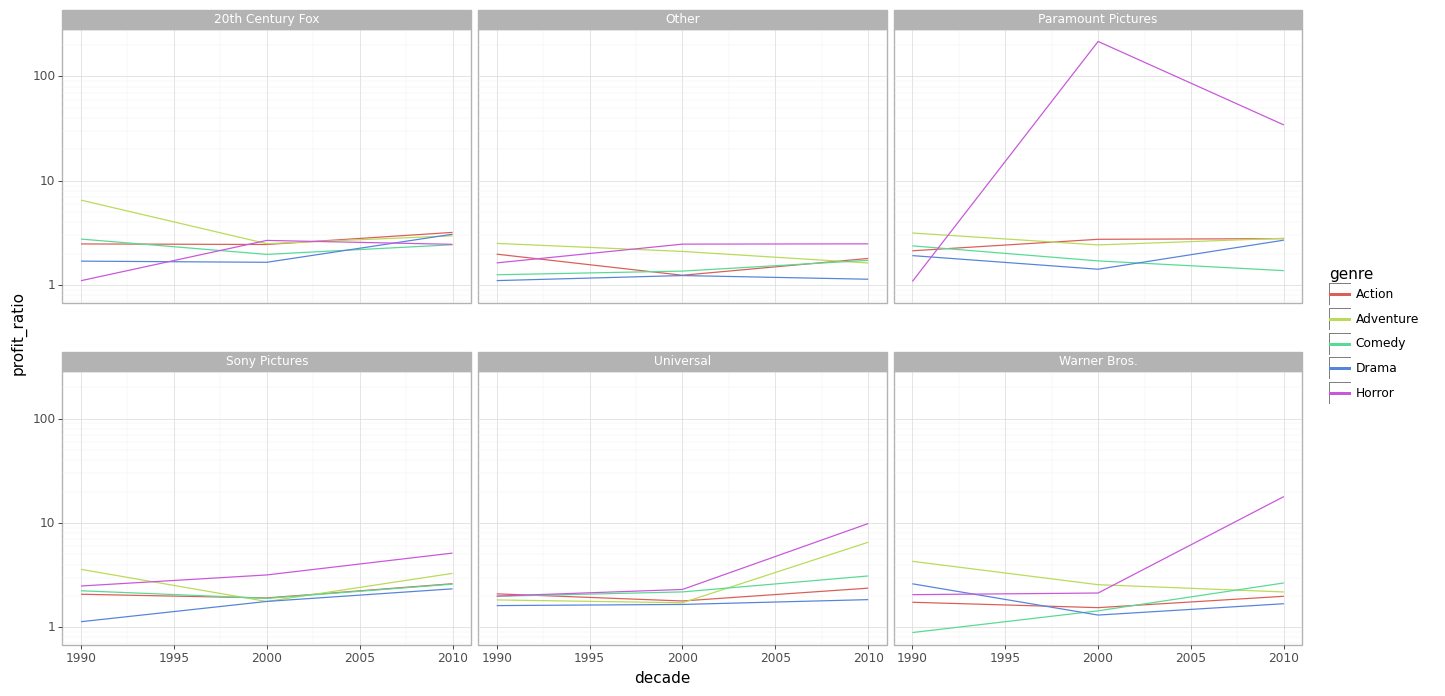

<ggplot: (103911176777)>

In [167]:
(
    ggplot(year_trends[year_trends['decade'] >= 1990], aes(x = 'decade', y = 'profit_ratio', color = 'genre'))
    + geom_line()
    + scale_y_log10()
    + facet_wrap('distributor')
    + theme(figure_size=(16, 8), subplots_adjust = {'hspace': 0.25})
)

### Clearly horror movies have made a lot of money back post 2010. More than 6 times on median 

In [176]:
horror_movies = movie_profit[movie_profit['genre'] == 'Horror']
horror_movies

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,decade,profit_ratio
43,2007-12-14,I am Legend,150000000.0,256393010.0,585532684.0,Warner Bros.,PG-13,Horror,2000,3.903551
67,2010-02-12,The Wolfman,150000000.0,62189884.0,142634358.0,Universal,R,Horror,2010,0.950896
233,2017-05-19,Alien: Covenant,97000000.0,74262031.0,238521247.0,20th Century Fox,R,Horror,2010,2.458982
272,2000-08-04,Hollow Man,90000000.0,73209340.0,191200000.0,Sony Pictures,R,Horror,2000,2.124444
287,2001-02-09,Hannibal,87000000.0,165092266.0,350100280.0,Other,R,Horror,2000,4.024141
...,...,...,...,...,...,...,...,...,...,...
3374,1983-01-01,E tu vivrai nel terrore - L'aldilà,400000.0,126387.0,126387.0,Other,NaN,Horror,1980,0.315968
3376,2004-12-10,Fabled,400000.0,31425.0,31425.0,Other,R,Horror,2000,0.078562
3377,2005-10-13,The Dark Hours,400000.0,423.0,423.0,Other,R,Horror,2000,0.001058
3379,1980-01-01,Maniac,350000.0,10000000.0,10000000.0,Other,NaN,Horror,1980,28.571429


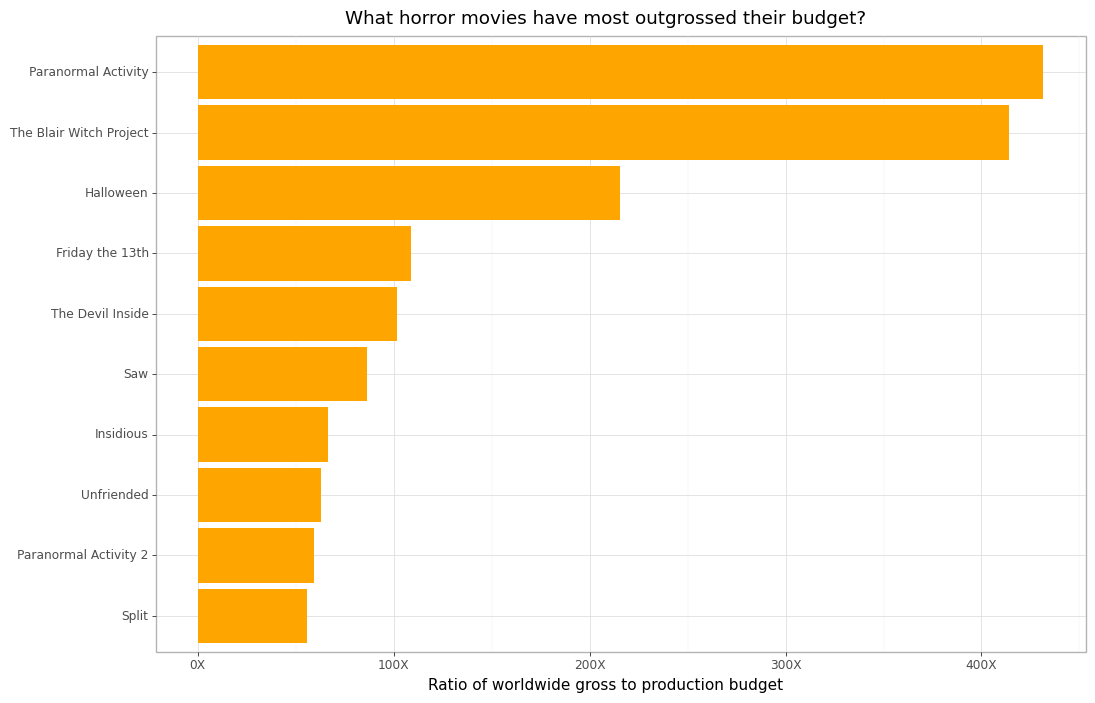

<ggplot: (103907438005)>

In [190]:
(
    ggplot(horror_movies.sort_values('profit_ratio', ascending=False).head(10), aes(x = 'movie', y = 'profit_ratio'))
    + geom_col(fill = 'orange')
    + coord_flip()
    + scale_x_discrete(limits = horror_movies.sort_values('profit_ratio', ascending=False).head(10)['movie'].to_list()[::-1])
    + scale_y_continuous(labels = custom_format('{:n}X'))
    + labs(x = "", y = 'Ratio of worldwide gross to production budget', title = 'What horror movies have most outgrossed their budget?')
    + theme(figure_size= (12, 8))
)

## Decade Trends 

In [58]:
movie_profit['decade'].value_counts().sort_index()

1930       2
1940       4
1950       6
1960      19
1970      63
1980     228
1990     607
2000    1387
2010     994
Name: decade, dtype: int64

In [64]:
decade_trends = movie_profit[['decade', 'production_budget', 'domestic_gross', 'worldwide_gross']].groupby('decade').median().reset_index()
decade_trends

,decade,production_budget,domestic_gross,worldwide_gross
0,1930,2700000.0,99421857.5,195345120.5
1,1940,1664123.5,47381250.0,47534454.0
2,1950,4500000.0,37650000.0,37650000.0
3,1960,9000000.0,30000000.0,60000000.0
4,1970,7000000.0,37799643.0,41833347.0
5,1980,12000000.0,26496790.0,27100420.0
6,1990,25530000.0,28965197.0,36404841.0
7,2000,22000000.0,22400154.0,38788828.0
8,2010,22000000.0,25903210.5,49551980.0


The data for 1930 tells me something is wrong. Maybe the inflation has been adjusted wrongly. Lets look at the 1930 decade movies

In [63]:
movie_profit[movie_profit['decade'] == 1930]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,decade,profit_ratio
2983,1939-12-15,Gone with the Wind,3900000.0,198680470.0,390525192.0,Other,G,Drama,1930,100.134665
3218,1936-02-05,Modern Times,1500000.0,163245.0,165049.0,Other,G,Comedy,1930,0.110033


#### Gone with the Wind—first released in 1939—is generally considered to be the most successful film, with Guinness World Records in 2014 estimating its adjusted global gross at $3.4 billion. 

[Wiki](https://en.wikipedia.org/wiki/List_of_highest-grossing_films)

The wiki article contains a list of movies adjusted for inflation. Thus the dataset can be considered adjusted for inflation

In [67]:
decade_trends_melted = decade_trends.melt(id_vars='decade', var_name='metric', value_name='median')
decade_trends_melted

,decade,metric,median
0,1930,production_budget,2700000.0
1,1940,production_budget,1664123.5
2,1950,production_budget,4500000.0
3,1960,production_budget,9000000.0
4,1970,production_budget,7000000.0
5,1980,production_budget,12000000.0
6,1990,production_budget,25530000.0
7,2000,production_budget,22000000.0
8,2010,production_budget,22000000.0
9,1930,domestic_gross,99421857.5


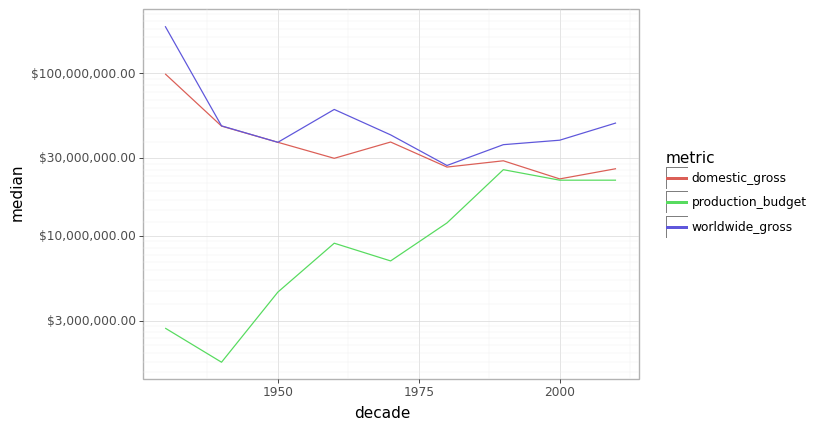

<ggplot: (103897615330)>

In [72]:
(
    ggplot(decade_trends_melted, aes(x = 'decade', y = 'median', color = 'metric'))
    + geom_line()
    + scale_y_log10(labels = currency_format('$', big_mark=','))
)

### What are the most profitable movies?

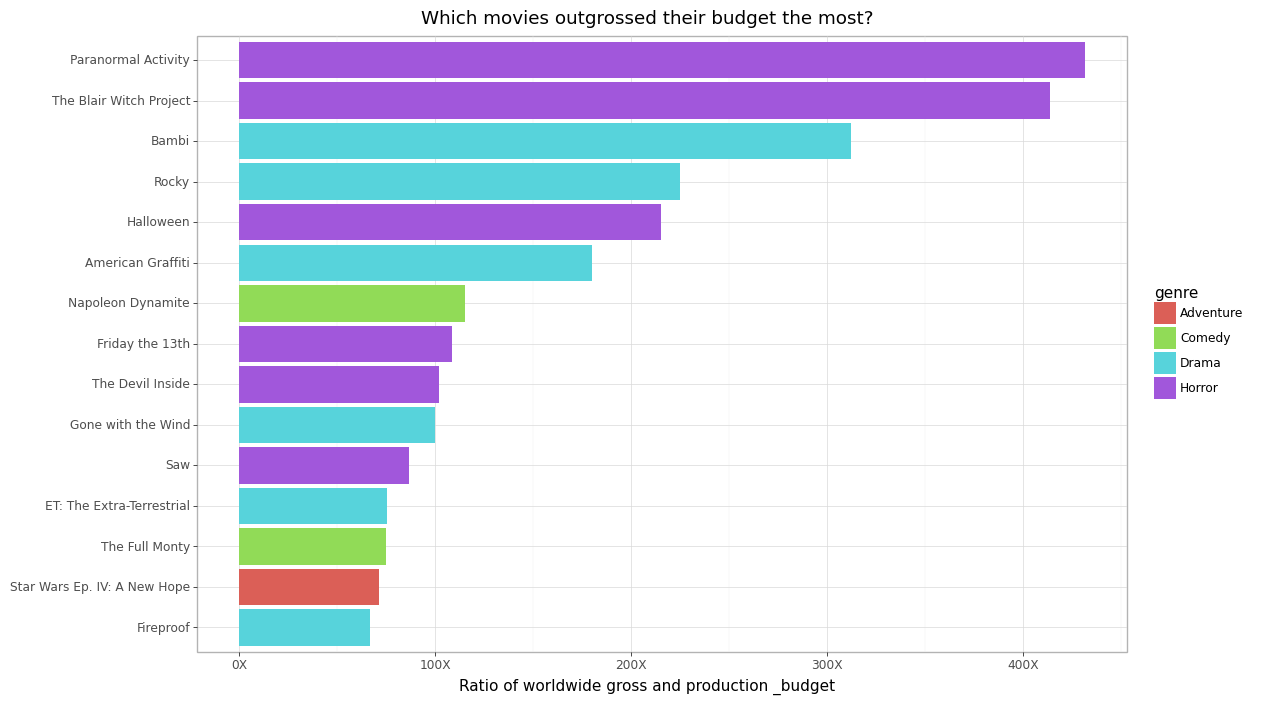

<ggplot: (103914692226)>

In [199]:
(
    ggplot(movie_profit.sort_values('profit_ratio', ascending=False).head(15), aes(x = 'movie', y = 'profit_ratio', fill = 'genre'))
    + geom_col()
    + coord_flip()
    + scale_x_discrete(limits = movie_profit.sort_values('profit_ratio', ascending=False).head(15)['movie'][::-1])
    + scale_y_continuous(labels = custom_format('{:n}X'))
    + labs(x = "", y = 'Ratio of worldwide gross and production _budget', title = 'Which movies outgrossed their budget the most?')
    + theme(figure_size=(12, 8))
)